In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

#  Model deployment

In [2]:
#Training model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [3]:
#Getting parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

# Training data 

In [4]:
#Moulding train images
train_datagen = image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2,zoom_range = 0.2, horizontal_flip = True)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [5]:
#Reshaping test and validation images 
train_generator = train_datagen.flow_from_directory(
    'Data Sets/brain_tumor_dataset/train',
    target_size = (224,224),
    batch_size = 10,
    class_mode = 'binary')
validation_generator = test_dataset.flow_from_directory(
    'Data Sets/brain_tumor_dataset/test',
    target_size = (224,224),
    batch_size = 10,
    class_mode = 'binary')

Found 200 images belonging to 2 classes.
Found 53 images belonging to 2 classes.


In [7]:
#Training the model
hist_new = model.fit_generator(
    train_generator,
    steps_per_epoch=20,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps=5
)

Epoch 1/50
20/20 [==============================] - 13s 645ms/step - loss: 0.7769 - acc: 0.5400 - val_loss: 0.6802 - val_acc: 0.9400
Epoch 2/50
20/20 [==============================] - 7s 332ms/step - loss: 0.6211 - acc: 0.6550 - val_loss: 0.5965 - val_acc: 0.7600
Epoch 3/50
20/20 [==============================] - 7s 336ms/step - loss: 0.5878 - acc: 0.7000 - val_loss: 0.6137 - val_acc: 0.9000
Epoch 4/50
20/20 [==============================] - 7s 348ms/step - loss: 0.6373 - acc: 0.7050 - val_loss: 0.5642 - val_acc: 0.7600
Epoch 5/50
20/20 [==============================] - 7s 345ms/step - loss: 0.6078 - acc: 0.6900 - val_loss: 0.4419 - val_acc: 0.9400
Epoch 6/50
20/20 [==============================] - 7s 340ms/step - loss: 0.6146 - acc: 0.6900 - val_loss: 0.4099 - val_acc: 0.9000
Epoch 7/50
20/20 [==============================] - 7s 343ms/step - loss: 0.6646 - acc: 0.7000 - val_loss: 0.6008 - val_acc: 0.9400
Epoch 8/50
20/20 [==============================] - 7s 340ms/step - loss: 0

In [8]:
#Getting summary
summary=hist_new.history
print(summary)

{'loss': [0.7769158691167831, 0.6210637792944909, 0.5878067120909691, 0.6372602552175521, 0.6078306823968888, 0.6145773187279702, 0.6645714655518532, 0.5564745046198368, 0.5160209611058235, 0.5450122281908989, 0.5309114448726178, 0.5445162266492843, 0.5239444866776466, 0.4570372499525547, 0.48112134635448456, 0.47711013704538346, 0.46908277869224546, 0.3875730291008949, 0.3997978255152702, 0.4255998283624649, 0.39728895351290705, 0.38379448354244233, 0.3956535864621401, 0.3658193234354258, 0.3475970787927508, 0.2847542054951191, 0.3442289838567376, 0.34486781284213064, 0.32803119346499443, 0.36358825154602525, 0.3061677932739258, 0.34944905526936054, 0.3505136802792549, 0.26950111947953703, 0.3034362383186817, 0.28887814823538066, 0.2638344533741474, 0.29384498968720435, 0.30219002994708716, 0.29083747044205666, 0.2925821665674448, 0.23718911465257406, 0.28101892322301864, 0.24358768109232187, 0.3122235517948866, 0.24699559397995471, 0.20969428594689815, 0.1986135056242347, 0.226453516

In [ ]:
model.save("model_covid.h5")

In [9]:
model.evaluate_generator(train_generator)

[0.15605234699323772, 0.94]

In [10]:
print(model.evaluate_generator(validation_generator))

[0.37172803717354935, 0.8113208]


## Confusion Matrix

In [12]:
import os
train_generator.class_indices

{'no': 0, 'yes': 1}

In [13]:
y_actual, y_test = [],[]

In [14]:
for i in os.listdir(r"Data Sets/brain_tumor_dataset/test\no/"):
    img=image.load_img(r"Data Sets/brain_tumor_dataset/test\no/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict_classes(img)
    y_test.append(pred[0,0])
    y_actual.append(1)
    

In [15]:
for i in os.listdir("Data Sets/brain_tumor_dataset/test\yes/"):
    img=image.load_img("Data Sets/brain_tumor_dataset/test\yes/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict_classes(img)
    y_test.append(pred[0,0])
    y_actual.append(0)

In [16]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [17]:
y_actual

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cn=confusion_matrix(y_actual,y_test)

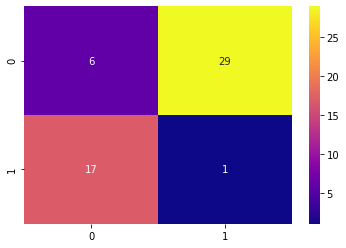

In [20]:
sns.heatmap(cn,cmap="plasma",annot=True) #0: Covid ; 1: Normal

In [21]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_actual,y_test)
a

0.1320754716981132